In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [7]:
# Create a histplot function
def histplot(column_name, discrete=1):
    col = column_name
    feature = df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig,ax = plt.subplots(figsize=(8,4))
    if discrete == 0:
        sns.histplot(feature ,ax=ax, discrete=False, stat='probability', kde = True)
    else:    
        sns.histplot(feature ,ax=ax, discrete=True, stat='density', kde = True)
    ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();

In [8]:
def skew_function(column_name):
    feature = df[column_name]
    mean = feature.mean()
    median = feature.median()
    if median < mean:
        print('This feature is positively skewed.')
    else:
        print('This feature is negatively skewed.')

In [9]:
# Create a function to determine kurtosis
def kurtosis_function(column_name):
    kurt = stats.kurtosis(df[column_name], fisher = False)
    if kurt > 3:
        print(f'A kurtosis value of {kurt} indicates that it is Leptokurtic.')
        if kurt < 3.5:
             print(f'Though we could say it is Mesokurtic, as the value is close to 3.')       
    elif kurt < 3:
        print(f'A kurtosis value of {kurt} indicates that it is Platykurtic.')
        if kurt > 2.5:
             print(f'Though we could say it is Mesokurtic, as the value is close to 3.')       
    else:
        print(f'A kurtosis value of {kurt} indicates that it perfectly Mesokurtic.') 

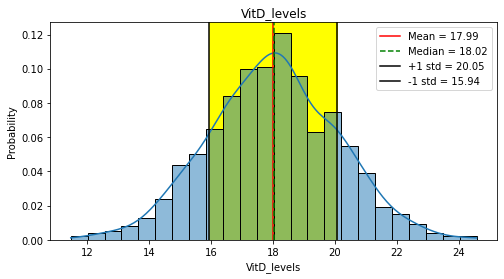

In [10]:
# VitD_levels
histplot('VitD_levels', 0)

This column is continuous.

In [11]:
skew_function('VitD_levels')

This feature is negatively skewed.


In [12]:
# kurtosis display
kurtosis_function('VitD_levels')

A kurtosis value of 3.013147515833447 indicates that it is Leptokurtic.
Though we could say it is Mesokurtic, as the value is close to 3.


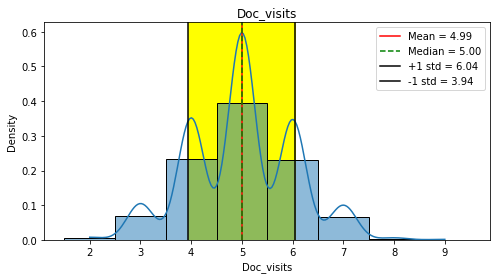

In [13]:
histplot('Doc_visits', 1)

This column is discrete as only integer values are possible.

In [14]:
# skew in doctor visits
skew_function('Doc_visits')


This feature is negatively skewed.


The feature is only  slightly negatively skewed. Mean and median are close to the same value so it is almost normally distribution. 


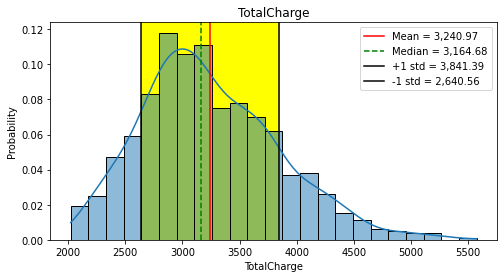

In [15]:
histplot('TotalCharge', 0)

This column is continuous.

In [ ]:
skew_function('TotalCharge')
